### Predicting Airline passenger satisfaction


You are given a dataset that holds information from a passenger survey.
Your job is to build an ML model that can predict passenger satisfaction given information about their travel.


#### Dataset ####
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


***

# Assigment 1 - Predicting Airline passenger satisfaction

**Isabelle Bricaud** 

***

## Objective

We have a dataset containing information from airline passenger survey. First, we will examine and understand our data to determine if any cleaning is necessary. Then, we will work with the cleaned dataset to conduct in-depth analyses to uncover relationships within the data, focusing our efforts on passenger satisfaction. Finally, we will identify the best classifier to predict passenger satisfaction and optimize the model's learning process using parameters to ensure it performs as effectively as possible.

## Loading the libraries & the dataset

Here we are loading the Python libraries that we will need to read the dataset from the csv file and the ones we will need to explore the data. We are creating our DataFrame based on the csv file.

In [4]:
#loading library & read the dataset from the csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./dataset/airline.csv")

## Exploring the dataset 

First we will print a little overview of the dataset to see which data is reported in this csv file. We will use the **head()** function to see the first five rows of the dataset.

In [6]:
'''five first rows'''
df.head() 

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


We are now checking all the datatypes of the values in the columns with the **info()** function. We will be able to see if all the lines are filled in or if we're going to have missing data.

In [8]:
'''having all datatypes'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

### Observations

As we can see with the **info()** function, there is 129880 - 129487 = **393** values that are null in the *Arrival Delay in Minutes* column. We also got different datatypes in our dataset, we got some integers and some strings and some float due to the null values. We will need to do something about these values.

---

With the **describe()** function we will get all the descriptive statistics including mean, standard deviation, percentiles, max & min values and the count of all the values for each column.

In [10]:
'''overview of the values (numeric only) of the colums'''
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


We can observe here that we don't have any negative value, so we will not do any change to positive value.

### Checking the null values

First, we are going to check all the lines of the DataFrame where there could be some missing values. We are returning a tuple with the number of rows and columns that contain null values

In [13]:
null_fields=df[df.isnull().any(axis=1)]
null_fields.shape

(393, 24)

Here, we can see that we find again the same number 393 of missing values.

We will check more precisely where are the missing values.

In [15]:
# check for null values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

### Observations

We can now confirm that the 393 missing values are indeed in the *Arrival Delay in Minutes* column.

What should we do about these values ? 

1 - We could completely drop them as 393 of 129880 is a small sample of the entire dataset.

2 - As we can see with the describe() function, the columns Arrival delay in Minutes & Departure Delay in Minutes are quite the same. So, we could take the values in the Departure Delay in Minutes for the missing rows and we could carry over theses values to the Arrival Delay in Minutes column to the corresponding rows.

3 - Or, we could replace the missing values with the mean of the values of the Arrival Delay in Minutes.

We are going to keep the values and we will use the mean to replace the null values.

---

In [17]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [18]:
# check for null values
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [19]:
null_fields=df[df.isnull().any(axis=1)]
null_fields.shape

(0, 24)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

When we are checking again the null values, it seems that we have no more missing values. Also, we can confirm that the values have indeed been replaced because we got 129880 values for the concerned column and it fits with the dataset size.

### Checking duplicate values

We will now check for any duplicated values and clean the data in consequence.

In [23]:
df[df.duplicated()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


With the **duplicated()** method, we can check if there is any line duplicated. If there is any duplicated line, it will be printed, here we can see that there is no duplicate line as there is not any printed line.

Some categorical data may contain duplicate value, we will check this with the unique() function. Then, we are going to check the values of the fiels 'Gender', 'Customer Type', 'Type of Travel', 'Class' and 'Satisfaction'.

In [25]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [27]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [28]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [29]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

They all seem fine, all are unique values.

### Checking for unusual value 

We will use the value_counts() function to see if some values are totaly unexpected or if every values are good.


In [32]:
df['Gender'].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [33]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [34]:
df['Age'].value_counts()

Age
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: count, Length: 75, dtype: int64

In [35]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [36]:
df['Class'].value_counts()

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

In [37]:
df['Flight Distance'].value_counts()

Flight Distance
337     841
594     505
404     480
862     473
2475    470
       ... 
1484      1
778       1
1434      1
1361      1
884       1
Name: count, Length: 3821, dtype: int64

In [38]:
df['Inflight wifi service'].value_counts()

Inflight wifi service
2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: count, dtype: int64

In [39]:
df['Departure/Arrival time convenient'].value_counts()

Departure/Arrival time convenient
4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: count, dtype: int64

In [40]:
df['Ease of Online booking'].value_counts()

Ease of Online booking
3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: count, dtype: int64

In [41]:
df['Gate location'].value_counts()

Gate location
3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: count, dtype: int64

In [42]:
df['Food and drink'].value_counts()

Food and drink
4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: count, dtype: int64

In [43]:
df['Online boarding'].value_counts()

Online boarding
4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: count, dtype: int64

In [44]:
df['Seat comfort'].value_counts()

Seat comfort
4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: count, dtype: int64

In [45]:
df['Inflight entertainment'].value_counts()

Inflight entertainment
4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: count, dtype: int64

In [46]:
df['On-board service'].value_counts()

On-board service
4    38703
5    29492
3    28542
2    18351
1    14787
0        5
Name: count, dtype: int64

In [47]:
df['Leg room service'].value_counts()

Leg room service
4    35886
5    30905
3    25056
2    24540
1    12895
0      598
Name: count, dtype: int64

In [48]:
df['Baggage handling'].value_counts()

Baggage handling
4    46761
5    33878
3    25851
2    14362
1     9028
Name: count, dtype: int64

In [49]:
df['Checkin service'].value_counts()

Checkin service
4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: count, dtype: int64

In [50]:
df['Inflight service'].value_counts()

Inflight service
4    47323
5    34066
3    25316
2    14308
1     8862
0        5
Name: count, dtype: int64

In [51]:
df['Cleanliness'].value_counts()

Cleanliness
4    33969
3    30639
5    28416
2    20113
1    16729
0       14
Name: count, dtype: int64

In [52]:
df['Departure Delay in Minutes'].value_counts()

Departure Delay in Minutes
0      73356
1       3682
2       2855
3       2535
4       2309
       ...  
626        1
460        1
600        1
514        1
530        1
Name: count, Length: 466, dtype: int64

In [53]:
df['Arrival Delay in Minutes'].value_counts()

Arrival Delay in Minutes
0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
604.0        1
457.0        1
502.0        1
429.0        1
333.0        1
Name: count, Length: 473, dtype: int64

In [54]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

### Observations

It doesn't seem to have any unusual value. All are quite good distributed and no value does not make sense to the dataset. Sometimes the value associated to the 0 label are quite low but we will not drop them as they are not unusual.

Some data aren't using the same scale as others. When we are going to train our model, we will maybe need to do a feature scaling to adjust the different scales and have all our dataset in the same scale after this technique.

***

### Exploring the distribution of the features

First, we will plot all the distributions of all the numerical features to get a great overview of each feature.

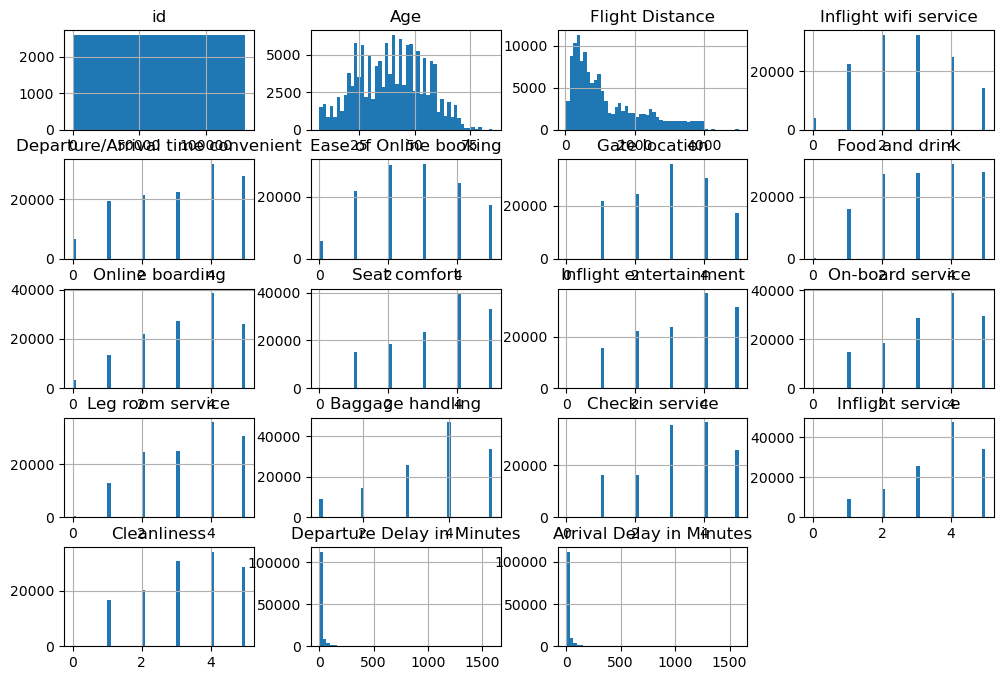

In [57]:
#plot distributions
df.hist(bins=50, figsize=(12,8))
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

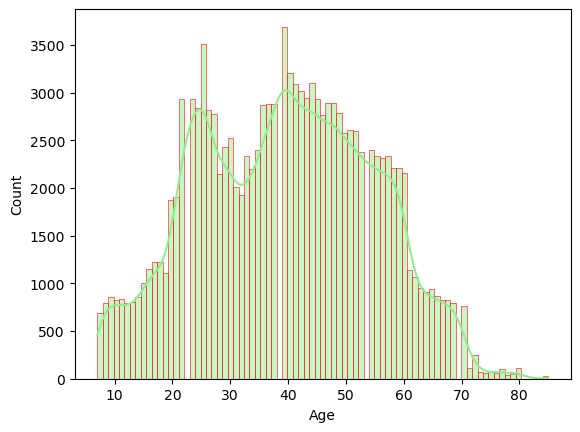

In [58]:
sns.histplot(df['Age'], kde=True, color='lightgreen', edgecolor='red')

<Axes: xlabel='Flight Distance', ylabel='Count'>

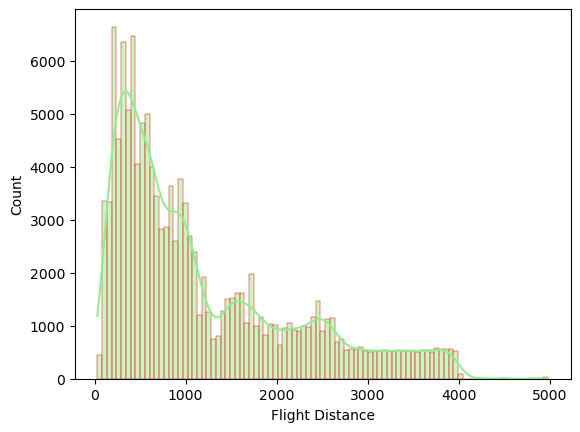

In [59]:
sns.histplot(df['Flight Distance'], kde=True, color='lightgreen', edgecolor='red')

### Observations

Apart from the features 'id', 'age', 'flight distance', 'arrival delay in minutes' and 'departure delay in minutes', we can see that the others ones have values from 0 to 5 as a notation from 0 to 5 about the satisfaction of the passengers. To predict the satisfaction of the passengers, it will probably be the features to focus on.

---

Then we will plot the categorical features to get an overview of the distributions.

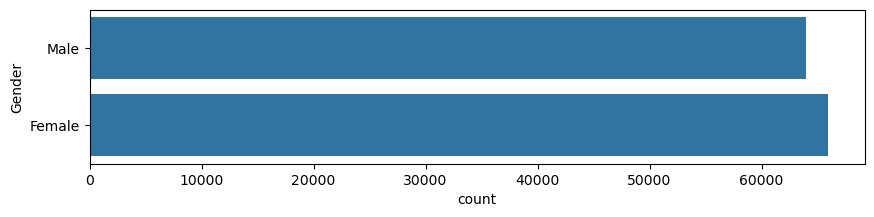

In [61]:
plt.figure(1, figsize = (10, 2))
sns.countplot( y = 'Gender', data = df)
plt.show()

The dataset contain almost the same sample of male and female, the gender will probably have no impact on the satisfaction.

<Axes: xlabel='Customer Type'>

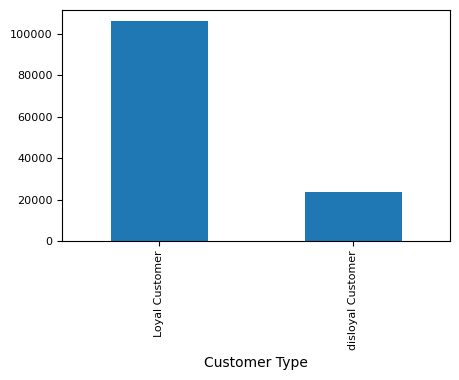

In [63]:
df['Customer Type'].value_counts().plot(kind='bar', figsize=(5,3), fontsize=8)

Most of the passengers are Loyal Customers.

<Axes: xlabel='Type of Travel'>

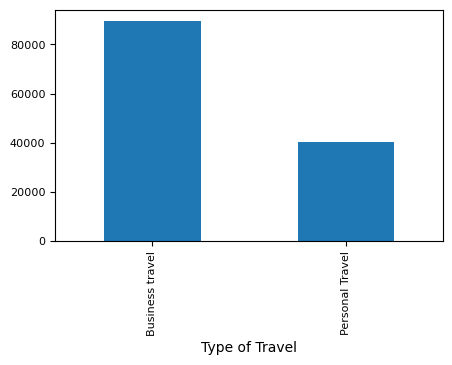

In [65]:
df['Type of Travel'].value_counts().plot(kind='bar', figsize=(5,3), fontsize=8)

A third of all passengers are travelling for personal purpose.

<Axes: xlabel='Class'>

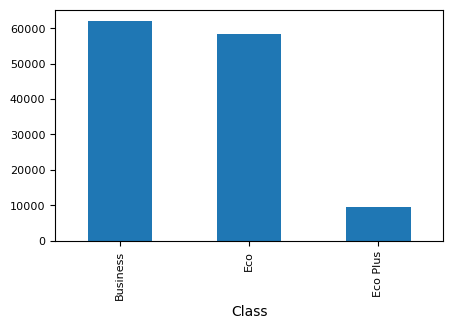

In [67]:
df['Class'].value_counts().plot(kind='bar', figsize=(5,3), fontsize=8)

We can see that half the passengers travel in business class and the other half in economy class, we probably could addition Eco and Eco Plus Class for the prediction.

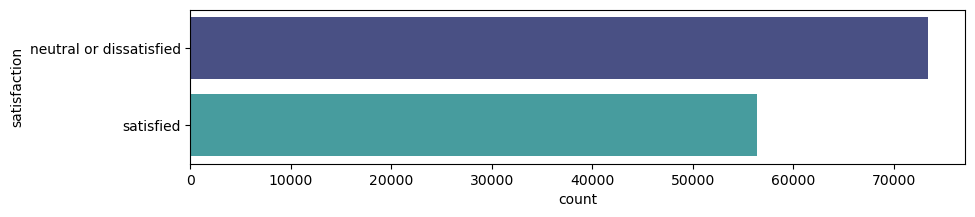

In [69]:
plt.figure(1, figsize = (10, 2))
sns.countplot( y = 'satisfaction', data = df, hue='satisfaction', palette='mako')
plt.show()

Most of the passengers are neutral or dissatisfied.

## Fixing data types

As we have check all null, duplicated and unusual values, we should now begin to clean our dataset to exploit it. First, we have seen that some values are still float one, we will change them into integer values.

In [72]:
def data_type_int(value):
    return int(value)

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].apply(data_type_int)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 129880 non-null  int64 
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Inflight wifi service              129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Ease of Online booking             129880 non-null  int64 
 10  Gate location                      129880 non-null  int64 
 11  Food and drink                     129880 non-null  

Now, we have only string and integer values.

Before cleaning deeper we will try to see if we could see any correlations between some values.

###  Investigate correlations between features

As we still have some categorical and numeric values, we need to precise that we only want a correlation matrix between numerical values only.

<Axes: >

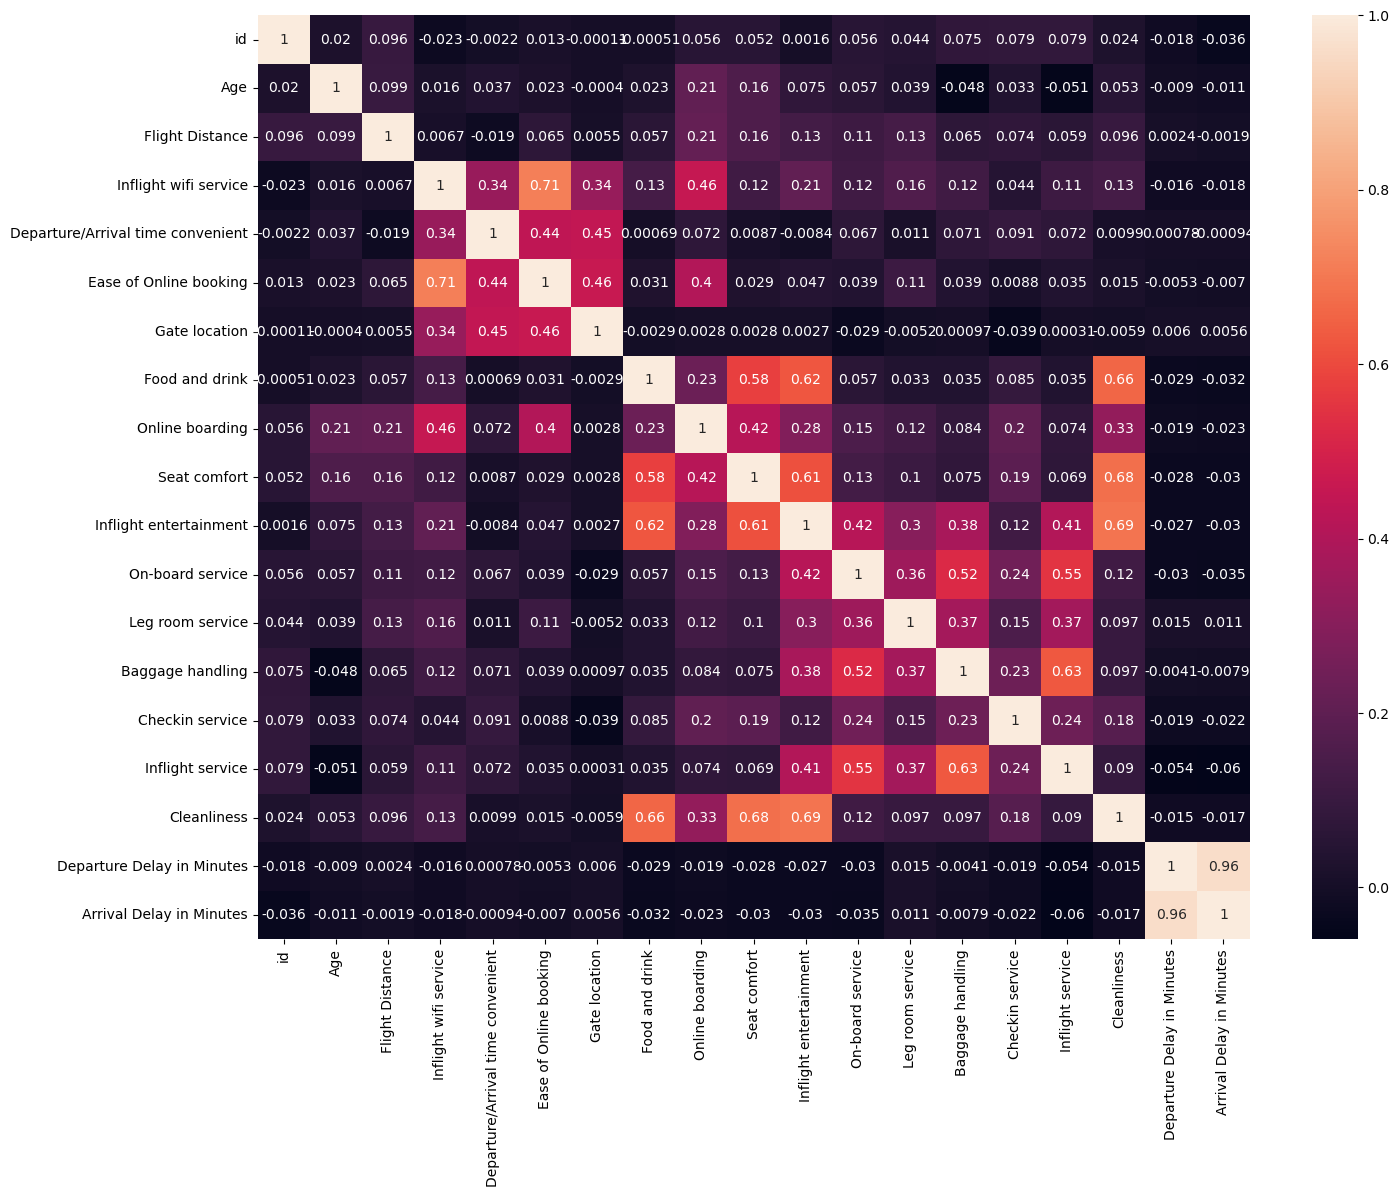

In [76]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot = True)

As satisafaction is not a numerical value, we can't compare the correlation to this feature. Then, we will explore the correlation between each numerical feature. 

One of the correlation that we can clearly see on this graph is the fact that Departure Delay in Minutes and Arrival Delay in Minutes are highly correlated to each other but not so much to other features.

As the matrix is big, it's complicated to see easily the correlation between the features. We will then calculate the sum of absolute correlation values for each variable to see the one feature that is the most correlated to the others.

In [78]:
corr_matrix = df.corr(numeric_only=True)

# Calculate the sum of absolute correlation values for each variable
global_corr_sum_abs = corr_matrix.abs().sum().sort_values(ascending=False)

print("Ranking of variables according to the sum of absolute correlations :")
print(global_corr_sum_abs)

Ranking of variables according to the sum of absolute correlations :
Inflight entertainment               5.365230
Seat comfort                         4.443768
Online boarding                      4.362745
Cleanliness                          4.307946
On-board service                     4.101354
Inflight wifi service                4.082562
Inflight service                     3.984090
Baggage handling                     3.855940
Food and drink                       3.645054
Ease of Online booking               3.483421
Leg room service                     3.438408
Checkin service                      3.054942
Departure/Arrival time convenient    2.701787
Flight Distance                      2.394811
Gate location                        2.355687
Arrival Delay in Minutes             2.307374
Departure Delay in Minutes           2.257900
Age                                  1.962514
id                                   1.674027
dtype: float64


The feature **Inflight entertainment** is the one that have the most correlations with the other ones.

We will then print the correlation matrix to this feature : 

In [80]:
corr_matrix['Inflight entertainment'].sort_values(ascending=False)

Inflight entertainment               1.000000
Cleanliness                          0.692511
Food and drink                       0.623461
Seat comfort                         0.611837
On-board service                     0.418574
Inflight service                     0.406094
Baggage handling                     0.379123
Leg room service                     0.300397
Online boarding                      0.283922
Inflight wifi service                0.207802
Flight Distance                      0.130507
Checkin service                      0.119554
Age                                  0.074947
Ease of Online booking               0.046564
Gate location                        0.002741
id                                   0.001620
Departure/Arrival time convenient   -0.008380
Departure Delay in Minutes          -0.027012
Arrival Delay in Minutes            -0.030187
Name: Inflight entertainment, dtype: float64

## Data encoding

We now need to encode the features that not hold numerical values. We will procede a mapping encoding for ordinal data such as Gender, Customer Type, Type of Travel and satisfaction.

### Ordinal data encoding

As these ordinal values can be assigned to binary values, we will assigned binary value to the string of these features.

In [83]:
from category_encoders.ordinal import OrdinalEncoder
maplist = [{'col': 'Gender',
 'mapping': {'Male': 0, 'Female': 1}}]
oenc = OrdinalEncoder(mapping=maplist)
df = oenc.fit_transform(df)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,0,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,1,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,1,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,0,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


In [84]:
maplist = [{'col': 'Customer Type',
 'mapping': {'Loyal Customer': 1, 'disloyal Customer': 0}}]
oenc = OrdinalEncoder(mapping=maplist)
df = oenc.fit_transform(df)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,0,0,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,1,1,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,1,1,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,0,1,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


In [85]:
maplist = [{'col': 'Type of Travel',
 'mapping': {'Personal Travel': 0, 'Business travel': 1}}]
oenc = OrdinalEncoder(mapping=maplist)
df = oenc.fit_transform(df)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,0,0,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,1,1,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,1,1,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,0,1,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


In [86]:
maplist = [{'col': 'satisfaction',
 'mapping': {'neutral or dissatisfied': 0, 'satisfied': 1}}]
oenc = OrdinalEncoder(mapping=maplist)
df = oenc.fit_transform(df)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,1,13,0,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,0
1,5047,0,0,25,1,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,0
2,110028,1,1,26,1,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,24026,1,1,25,1,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,0
4,119299,0,1,61,1,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,1


### Nominal data encoding

The feature 'Class' is a nominal value (does not represent ordering). This needs to be encoded using one-hot encoding.

In [88]:
#import library
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype='int64')
# Fit the encoder
one_hot_encoded = encoder.fit_transform(df[['Class']])
# create data frame with econded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Class']))

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_df], axis=1)
# Drop the original categorical columns
df = df.drop(['Class'], axis=1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,70172,0,1,13,0,460,3,4,3,1,...,4,4,5,5,25,18,0,0,0,1
1,5047,0,0,25,1,235,3,2,3,3,...,3,1,4,1,1,6,0,1,0,0
2,110028,1,1,26,1,1142,2,2,2,2,...,4,4,4,5,0,0,1,1,0,0
3,24026,1,1,25,1,562,2,5,5,5,...,3,1,4,2,11,9,0,1,0,0
4,119299,0,1,61,1,214,3,3,3,3,...,4,3,3,3,0,0,1,1,0,0


We can again plot the distributions of all values to see if the encoding went well anf if now they are indeed all numerical.

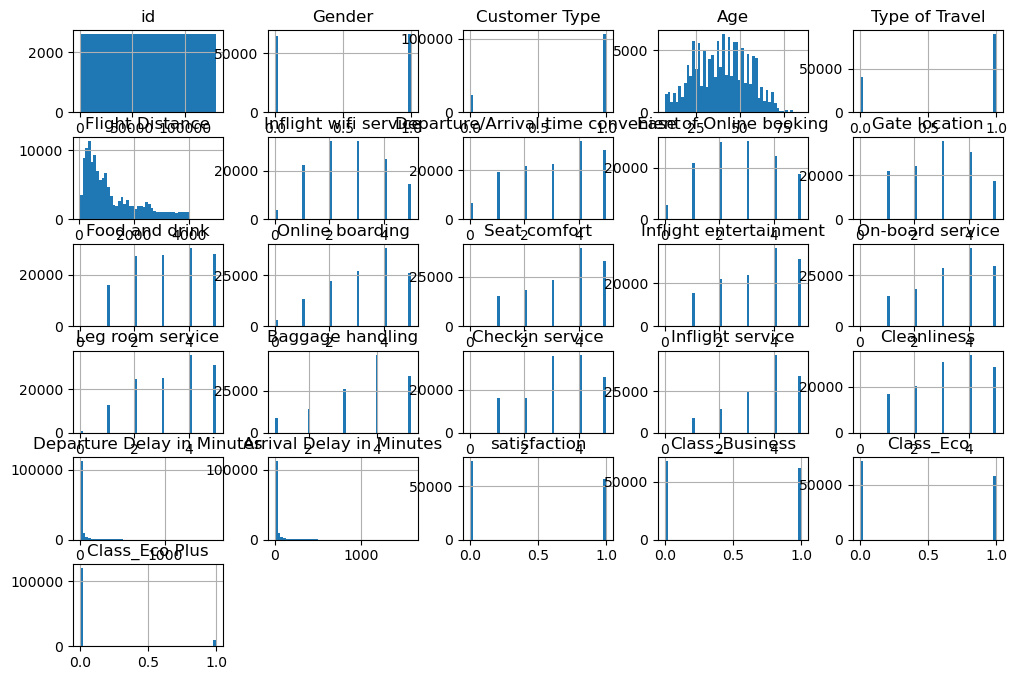

In [90]:
#plot distributions
df.hist(bins=50, figsize=(12,8))
plt.show()

## Exploratory Data Analysis

A scatter matrix will not help us to identify some correlations between features apart from seeing that satisfaction is related to all features where there is a notation between 0 to 5. But we could try to plot one with the features other than those from 0 to 5 to see if there is a relation between these other features.

We will concentrate on correlation matrix.

First we will plot one with all the features.

<function matplotlib.pyplot.show(close=None, block=None)>

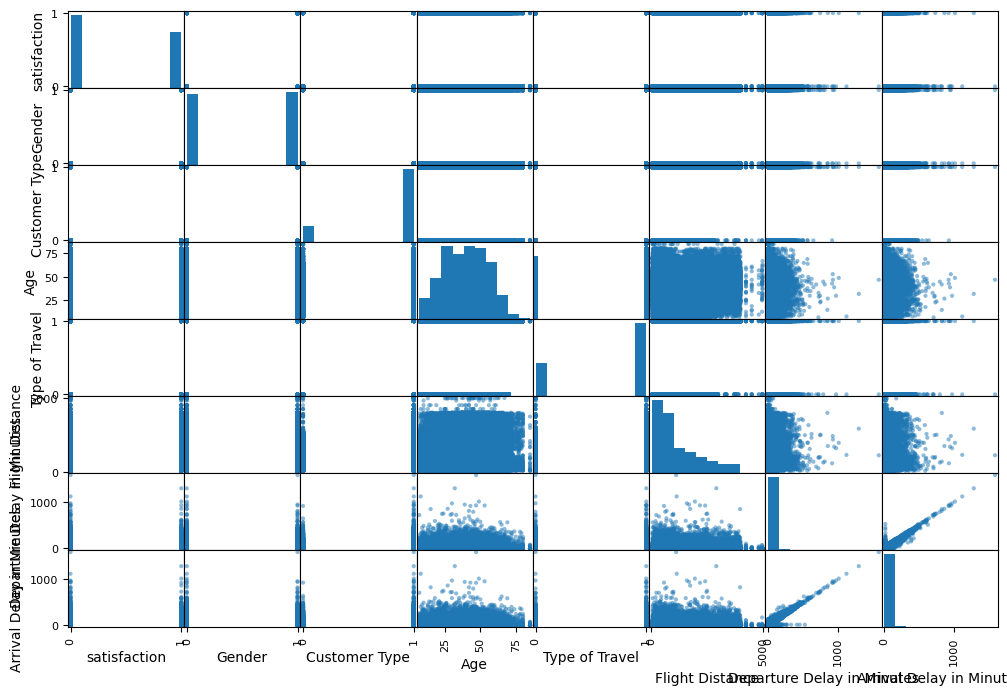

In [92]:
from pandas.plotting import scatter_matrix

attributes = ["satisfaction", "Gender", "Customer Type", "Age", "Type of Travel", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
scatter_matrix(df[attributes], figsize=(12,8))
plt.show

We don't see anything too correlated apart from Arrival Delay in Minutes and Departure Delay in Minutes.

<Axes: >

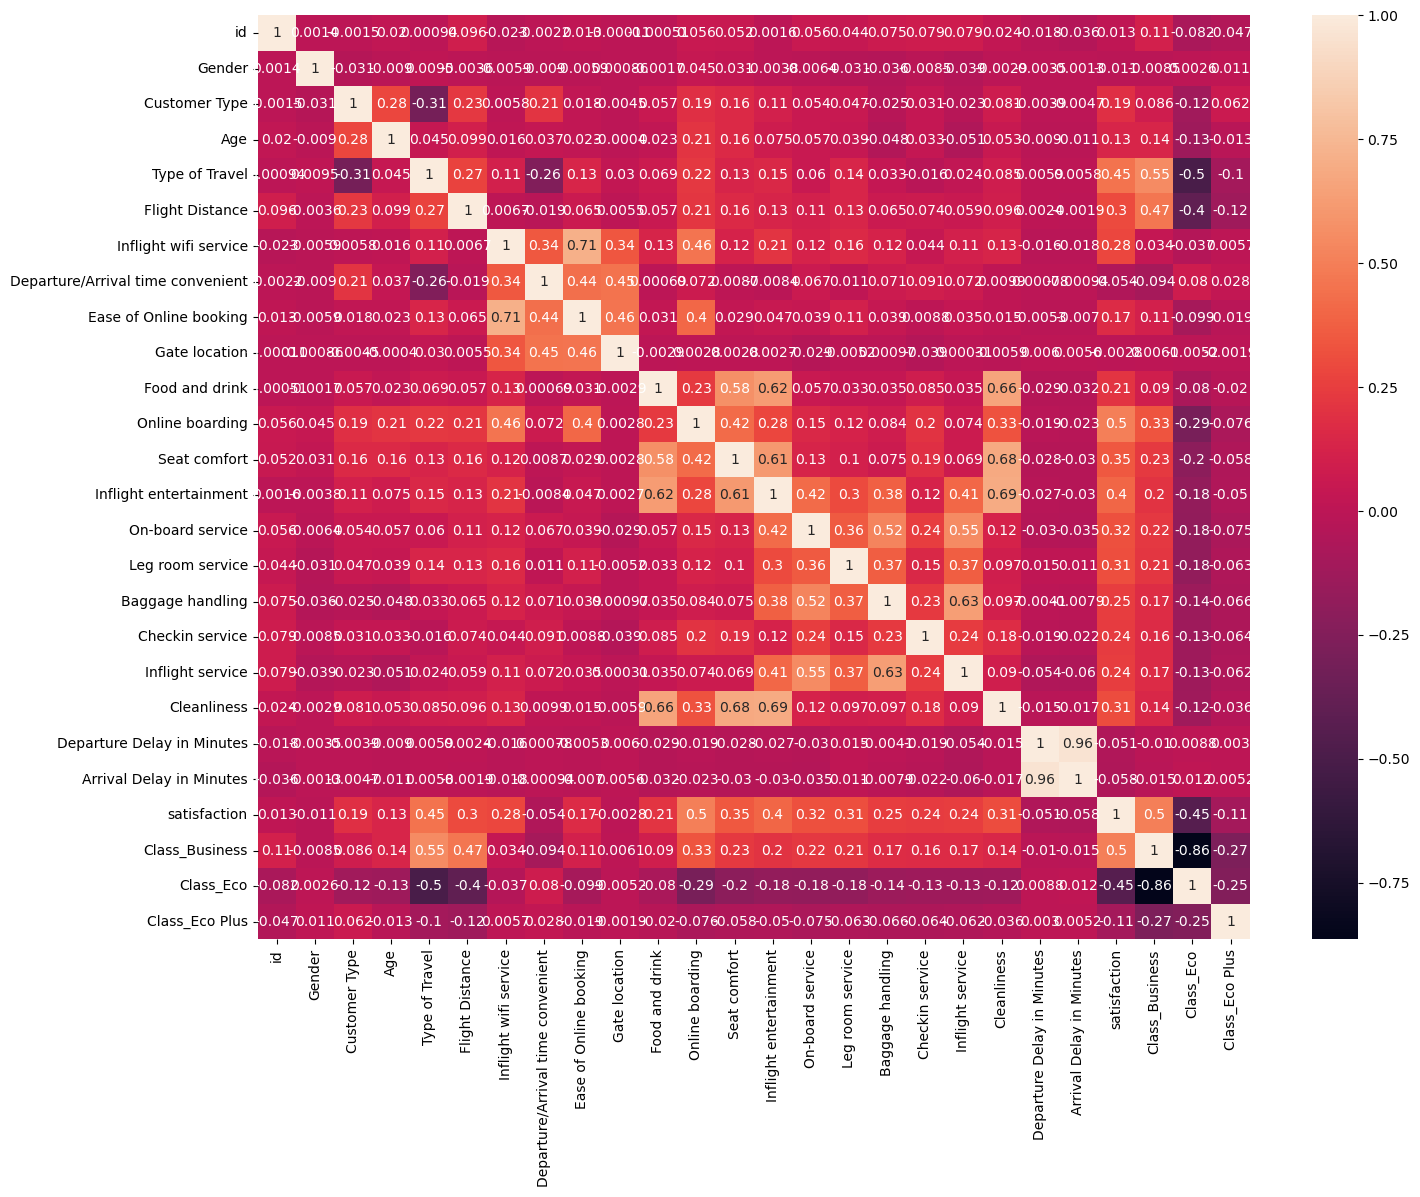

In [94]:
corr = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot = True)

In [95]:
corr_matrix = df.corr(numeric_only=True)

#Calculate the sum of absolute correlation values for each variable
global_corr_sum_abs = corr_matrix.abs().sum().sort_values(ascending=False)

print("Ranking of variables according to the sum of absolute correlations :")
print(global_corr_sum_abs)

Ranking of variables according to the sum of absolute correlations :
satisfaction                         6.901362
Inflight entertainment               6.454955
Class_Business                       6.199516
Online boarding                      6.022059
Class_Eco                            5.700122
Seat comfort                         5.604207
Cleanliness                          5.086891
On-board service                     5.026879
Type of Travel                       4.705127
Inflight service                     4.676881
Baggage handling                     4.576880
Inflight wifi service                4.560501
Leg room service                     4.428910
Flight Distance                      4.183997
Food and drink                       4.174353
Ease of Online booking               4.036901
Checkin service                      3.704655
Departure/Arrival time convenient    3.430651
Customer Type                        3.316790
Age                                  2.718833
Class_Eco P

### Observations

After the encoding step, we can now clearly see that **satisfaction** is our target and we will focus on it.

***

In [97]:
corr_matrix['satisfaction'].abs().sort_values(ascending=False)

satisfaction                         1.000000
Class_Business                       0.502476
Online boarding                      0.501749
Type of Travel                       0.449861
Class_Eco                            0.449386
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Flight Distance                      0.298085
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Customer Type                        0.186017
Ease of Online booking               0.168877
Age                                  0.134091
Class_Eco Plus                       0.106034
Arrival Delay in Minutes             0.058187
Departure/Arrival time convenient 

Here we see that some features are useless to our exploratory as they are correlated too few to satisfaction feature. We will then drop these and check again the correlation features to the satisfaction one.

We are droping all the features with an absolute correlation value under 0.15.

<Axes: >

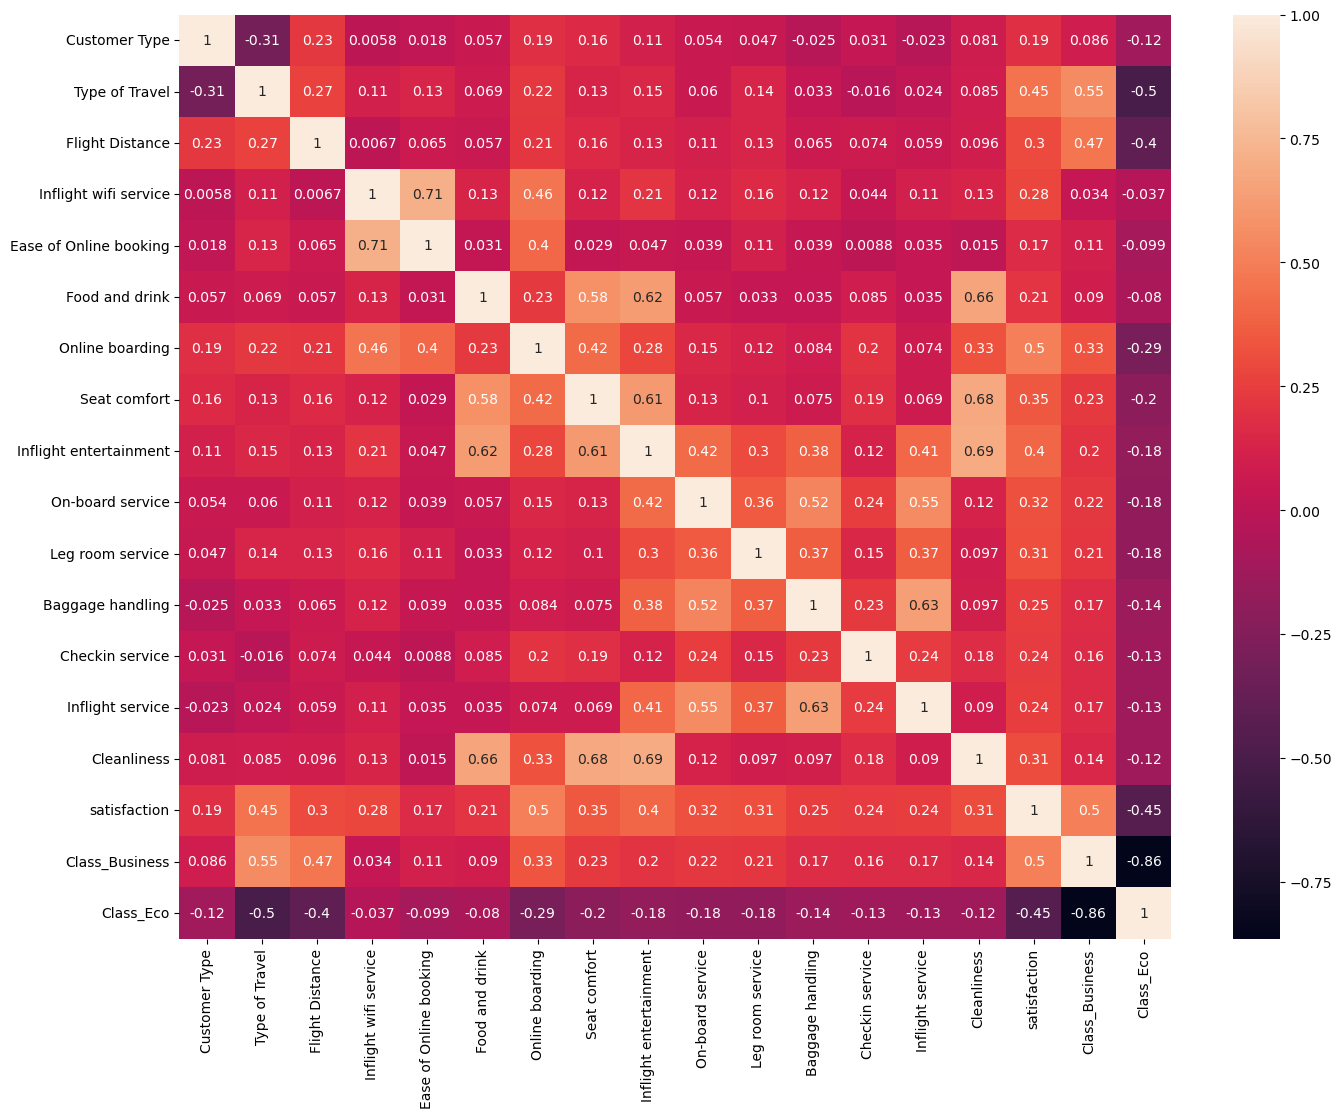

In [100]:
df = df.drop(["id", "Gender", "Gate location", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Age", "Class_Eco Plus", "Departure/Arrival time convenient"], axis = 1)
corr = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot = True)

The heatmap of the correlation between features is now much more lisible and we can now clearly see that all the features that we kept are quite related to satisfaction.

In [102]:
corr['satisfaction'].sort_values(ascending=False)

satisfaction              1.000000
Class_Business            0.502476
Online boarding           0.501749
Type of Travel            0.449861
Inflight entertainment    0.398234
Seat comfort              0.348829
On-board service          0.322205
Leg room service          0.312424
Cleanliness               0.307035
Flight Distance           0.298085
Inflight wifi service     0.283460
Baggage handling          0.248680
Inflight service          0.244918
Checkin service           0.237252
Food and drink            0.211340
Customer Type             0.186017
Ease of Online booking    0.168877
Class_Eco                -0.449386
Name: satisfaction, dtype: float64

It seems that the **Class_Business** feature is the feature that is the most related to satisfaction.

We will not proceed for a scatter matrix plot as it will not reveal new things, the distribution of data to the features is not appropriate for a scatter plot.

## Data processing ready

Our dataset is now well cleaned. We will then save it into another csv file to work on for the classifiers.

In [105]:
df.to_csv("./dataset/airline_v2.csv", index=False)

We just check if we truly have our new dataset well saved to work on and we reload it.

In [107]:
df = pd.read_csv('./dataset/airline_v2.csv')
df

,Customer Type,Type of Travel,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Class_Business,Class_Eco
0,1,0,460,3,3,5,3,5,5,4,3,4,4,5,5,0,0,0
1,0,1,235,3,3,1,3,1,1,1,5,3,1,4,1,0,1,0
2,1,1,1142,2,2,5,5,5,5,4,3,4,4,4,5,1,1,0
3,1,1,562,2,5,2,2,2,2,2,5,3,1,4,2,0,1,0
4,1,1,214,3,3,4,5,5,3,3,4,4,3,3,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,526,3,3,4,3,4,4,3,2,4,4,5,4,0,1,0
129876,1,1,646,4,4,4,4,4,4,4,5,5,5,5,4,1,1,0
129877,1,0,828,2,1,2,1,2,2,4,3,4,5,4,2,0,0,1
129878,1,1,1127,3,3,4,4,4,4,3,2,5,4,5,4,1,1,0


# Testing different models

We will work on different models to see which one could be the most appropriate to use for this dataset. We will try these models :

- Decision Tree
- Random Forest
- XGBoost
- Naive Bayes - Gaussian
- Naive Bayes - Bernoulli


First step is to seperate features and target data, we will then drop the satisfaction column for X and we will precise our target to Y.

In [109]:
# Split your data to feature matrix X and target vector y
X = df.drop(columns = ['satisfaction']) 
y = df['satisfaction']

# Check to make sure they have the same length
print(X.shape)
print(y.shape)

(129880, 17)
(129880,)


## Split data to get train/test sets

Second step, is to create the train and test sets. We generally use 20% for testing and 80% for training. We will use stratify = y to keep the same balance to the original data for the category satisfaction.

In [111]:
# Split training - testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(103904, 17) (25976, 17) (103904,) (25976,)


## Decision Tree

We will first try to train a Decision Tree Classifier and next see if other models could perform better.

In [113]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calcul
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf_tree = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer
clf_tree = clf_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_clf = clf_tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))
print("F1:",metrics.f1_score(y_test, y_pred_clf, average='weighted'))

Accuracy: 0.9400985525100093
F1: 0.9401248870405118


## Random Forest

We will then try to train a Random Forest classifier.

In [115]:
from sklearn.ensemble import RandomForestClassifier # Import Random Forest

clf_rfc = RandomForestClassifier(
 n_estimators = 100, # default
 max_features='sqrt',
 class_weight='balanced', # ensure balanced weights to account for class imbalan
 random_state=42)

# ToDo: Train Decision Tree Classifer
clf_rfc = clf_rfc.fit(X_train, y_train)

# ToDo: Predict the response for test dataset
y_pred_rfc = clf_rfc.predict(X_test)

# ToDo: Print the performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))
print("F1:",metrics.f1_score(y_test, y_pred_rfc, average='weighted'))

Accuracy: 0.957653218355405
F1: 0.9575636932252548


In [116]:
#Load libraries
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Gaussian Naive Bayes

We will then try to train a Gaussian model.

In [118]:
# Train the Gaussian NB model
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
predicted = modelGNB.predict(X_test)
  
print("The f1 score of Gaussian Naive Bayes model is : ", f1_score(y_test, predicted, average='weighted'))

The f1 score of Gaussian Naive Bayes model is :  0.8577700930492472


## Bernoulli Naive Bayes

We will then try to train a Bernoulli classifier.

In [120]:
# Train the Bernoulli NB classifier
modelBNB = BernoulliNB()
modelBNB.fit(X_train, y_train)
predicted = modelBNB.predict(X_test)
print("The f1 score of Bernoulli Naive Bayes model is : ", f1_score(y_test, predicted, average='weighted'))

The f1 score of Bernoulli Naive Bayes model is :  0.7767591547451118


## XGBoost

We will then try to train a XGBoost classifier.

In [122]:
# Train and test XGBoost classifier
modelXGB = xgb.XGBClassifier()
modelXGB.fit(X_train, y_train)
predicted = modelXGB.predict(X_test)
print("The f1 score of XGBoost model is : ", f1_score(y_test, predicted))

The f1 score of XGBoost model is :  0.9526038619075483


## Observations

We have tried different models in a simple way, we can see that some perform better than others. 

Ranking by best performance :

| Number | Model | F1 Score |
| ----------- | ----------- | ----------- |
| 1 | Random Forest | 0.9575636932252548 |
| 2 | XGBoost | 0.9526038619075483 |
| 3 | Decision Tree | 0.9401248870405118 |
| 4 | Gaussian | 0.8577700930492472 |
| 5 | Bernoulli | 0.7767591547451118 |


These values depend heavily on the random split between training and testing. We cannot trust this ranking entirely as we could get other performance with other methods.

***

## Feature Importance

We will print the feature importance of the three best model so far.

We will be able here to check which features are very important and the ones that are not. We will also be able to compare the features importances between each model.

### Random Forest

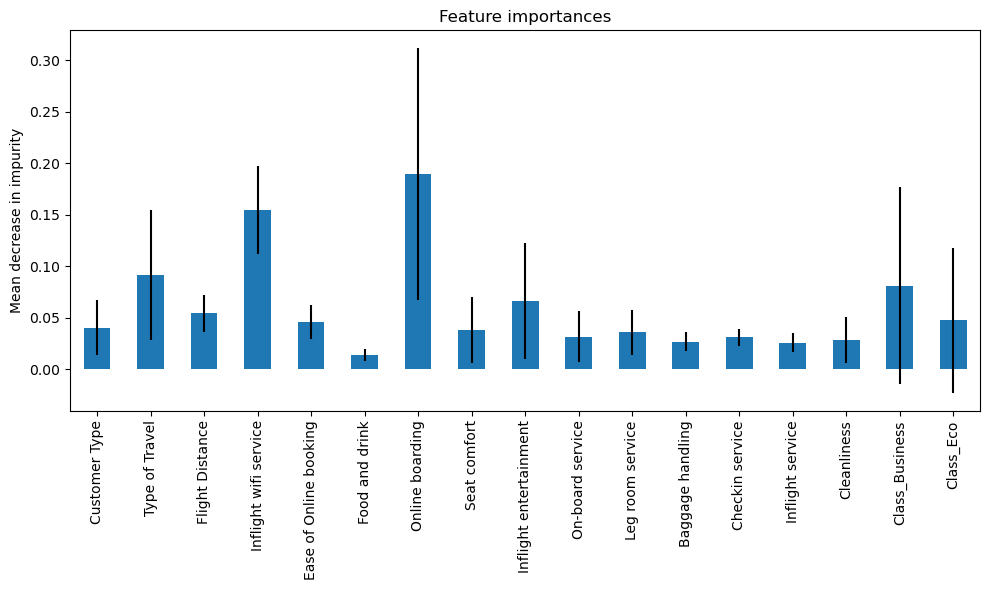

In [126]:
# Extract feature importance metrics and plot them
importances = clf_rfc.feature_importances_

# For visualisation: create a pandas series with the importance values
forest_importances = pd.Series(importances, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in clf_rfc.estimators_], axis=0)

# Configure the plot
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(10,6))
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [127]:
# Sort feature importances in descending order
sorted_importances = forest_importances.sort_values(ascending=False)

print(sorted_importances)

Online boarding           0.189626
Inflight wifi service     0.154548
Type of Travel            0.091646
Class_Business            0.080860
Inflight entertainment    0.066499
Flight Distance           0.054035
Class_Eco                 0.047211
Ease of Online booking    0.045694
Customer Type             0.040303
Seat comfort              0.037724
Leg room service          0.035830
On-board service          0.031219
Checkin service           0.030848
Cleanliness               0.027901
Baggage handling          0.026514
Inflight service          0.025684
Food and drink            0.013858
dtype: float64


### XGBoost

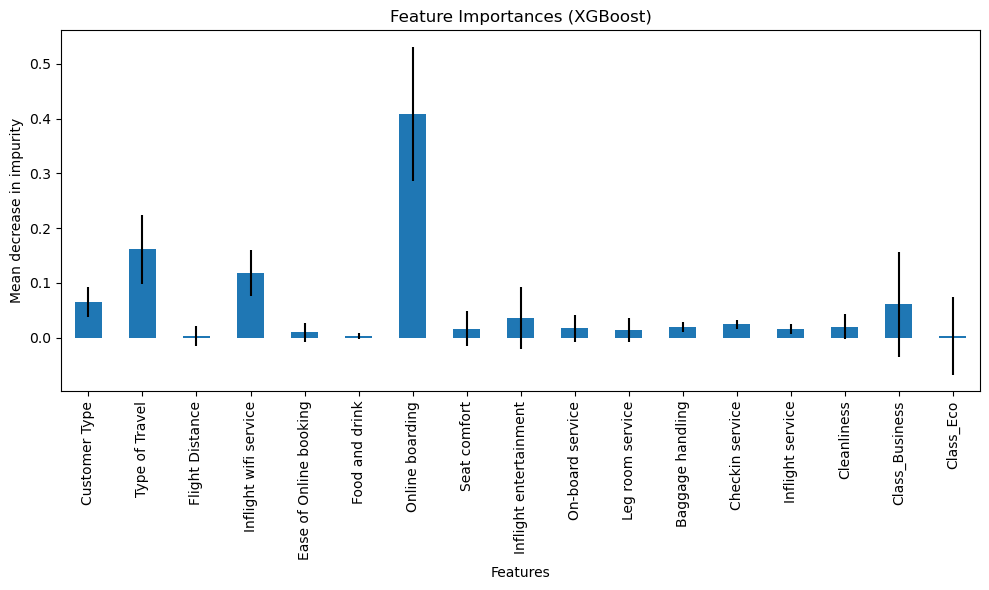

In [129]:
# Extract feature importances from the XGBoost model
importances = modelXGB.feature_importances_

xgb_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
xgb_importances.plot.bar(yerr=std, ax=ax, figsize=(10,6)) 
ax.set_title("Feature Importances (XGBoost)")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Features")
fig.tight_layout()
plt.show()

In [130]:
# Sort feature importances in descending order
sorted_importances = xgb_importances.sort_values(ascending=False)

print(sorted_importances)

Online boarding           0.408456
Type of Travel            0.161150
Inflight wifi service     0.118406
Customer Type             0.065705
Class_Business            0.061104
Inflight entertainment    0.036411
Checkin service           0.024581
Cleanliness               0.020308
Baggage handling          0.020128
On-board service          0.017054
Seat comfort              0.016784
Inflight service          0.015923
Leg room service          0.014733
Ease of Online booking    0.009876
Class_Eco                 0.003419
Food and drink            0.003060
Flight Distance           0.002905
dtype: float32


### Decision Tree

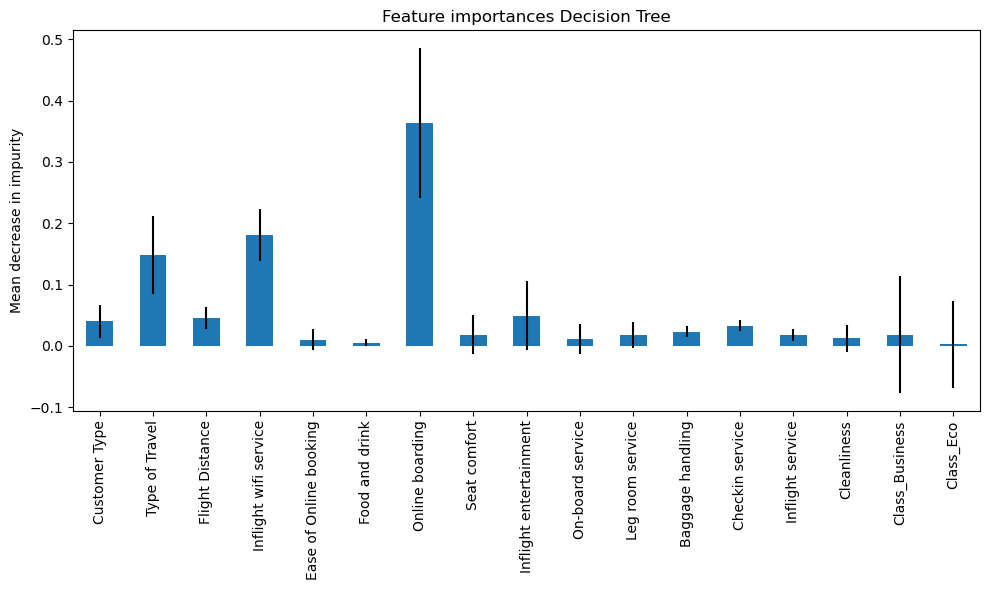

In [132]:
# Extract feature importances from the Decision Tree model
importances = clf_tree.feature_importances_

decision_tree_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
decision_tree_importances.plot.bar(yerr=std, ax=ax, figsize=(10,6))
ax.set_title("Feature importances Decision Tree")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [133]:
# Sort feature importances in descending order
sorted_importances = decision_tree_importances.sort_values(ascending=False)

print(sorted_importances)

Online boarding           0.363504
Inflight wifi service     0.181131
Type of Travel            0.148412
Inflight entertainment    0.049551
Flight Distance           0.045859
Customer Type             0.040344
Checkin service           0.033145
Baggage handling          0.023523
Class_Business            0.018583
Seat comfort              0.018423
Inflight service          0.017703
Leg room service          0.017617
Cleanliness               0.012249
On-board service          0.011421
Ease of Online booking    0.010365
Food and drink            0.005596
Class_Eco                 0.002575
dtype: float64


### Observations

With these three models, we could see that the feature **online boarding** is the most important in every case. We can also see that we will always find the features Online boarding, Inflight wifi service and Type of Travel in the three most important characteristics.

We could maybe drop other features that are not so useful to our prediction like 'Food and drink' and 'Class Eco'.

***

## Cross Validation

To get more reliable result we will use cross validation with our models. This technique is use to evaluate the performance of a model, we will be dividing the data into multiple folds, using one of the folds as a validation and the others for training the model. This process is repeated multiple times (we indicate the number of times in the code, it will be 10 times because it is the most common approach). It generally prevents from overfitting and permits us to get a more realistic estimation performance of the model.

### Gaussian Naive Bayes

We will then try to train a Gaussian model with cross validation and a number of folds of 10.

In [137]:
from sklearn.model_selection import cross_val_score

model = GaussianNB()
scores = cross_val_score(model, X, y, cv=10, scoring="f1_weighted")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), 
                                                    scores.std()))

0.8567 f1 with a standard deviation of 0.00


### Bernoulli Naive Bayes

We are doing the same now with the Bernoulli model.

In [139]:
model = BernoulliNB()
scores = cross_val_score(model, X, y, cv=10, scoring="f1_weighted")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), 
                                                    scores.std()))

0.7759 f1 with a standard deviation of 0.00


### XGBoost

We are doing the same now with the XGBoost classifier.

In [141]:
model = xgb.XGBClassifier()
scores = cross_val_score(model, X, y, cv=10, scoring="f1_weighted")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), 
                                                    scores.std()))

0.9612 f1 with a standard deviation of 0.00


### Decision Tree

We are doing the same now with the Decision Tree classifier.

In [143]:
model = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=10, scoring="f1_weighted")
print("%0.4f F1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.9430 F1 with a standard deviation of 0.00


### Random Forest

We are doing the same now with the Random Forest classifier.

In [145]:
model = RandomForestClassifier(n_estimators=100,
    max_features='sqrt',
    class_weight='balanced', 
    random_state=42)
scores = cross_val_score(model, X, y, cv=10, scoring="f1_weighted")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), 
                                                    scores.std()))

0.9599 f1 with a standard deviation of 0.00


## Observations

We have tried different models with cross validation, we should get better performance than before.

Ranking by best performance with **cross validation**:

| Number | Model | F1 Score |
| ----------- | ----------- | ----------- |
| 1 | XGBoost | 0.9612 |
| 2 | Random Forest | 0.9599 |
| 3 | Decision Tree | 0.9430 |
| 4 | Gaussian | 0.8567 |
| 5 | Bernoulli | 0.7759 |


We definitely have better performance for our best models and these results are more reliable as it reflects more thre reality.

Actually, we can do even better by using fine tuning parameter to get the best performance of our models.

***

## Parameter Fine Tuning

This technique is used on pre-trained models, we evaluate some parameters and we re-use them in the training of the model with the use of the GridSearchCV class. We are precising which hyperparameters we want to experiment and it will use the cross validation method to find the best parameter.

### Gaussian Naive Bayes

We are going to fine tune the var_smoothing parameter; it is a value that will be added to the calculations of variance to get more stability.

In [149]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   
                 verbose=1, 
                 scoring='f1_weighted')
gs_NB.fit(X_train, y_train)
gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1.232846739442066e-08}

Now that we get a value for var_smoothing, we will train again the model with this specified parameter.

In [151]:
# Training the model using the specified value for the parameter

model = GaussianNB(var_smoothing= 1.232846739442066e-08)
scores = cross_val_score(model, X, y, cv=10, scoring="f1_weighted")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.8570 f1 with a standard deviation of 0.00


### Bernoulli Naive Bayes

We are going to fine tune the alpha parameter. It is a Laplace smoothing parameter added to the feature counts. When we will get the best value with the GridSearchCV class, we will train again the model with the obtained value.

In [153]:
# Prepare fine tuning
bnb_classifier = BernoulliNB()
params_BNB = {'alpha': np.linspace(1/1000000, 20.0, 400)}

gs_BNB = GridSearchCV(estimator=bnb_classifier, 
                 param_grid=params_BNB, 
                 cv=5,   
                 verbose=1, 
                 scoring='f1_weighted')
gs_BNB.fit(X_train, y_train)
gs_BNB.best_params_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


{'alpha': 1e-06}

In [154]:
# Train and evaluate the classifier passing the right parameter
model = BernoulliNB(alpha= 1e-06)
scores = cross_val_score(model, X, y, cv=10, scoring="f1_weighted")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.7759 f1 with a standard deviation of 0.00


### XGBoost

We are going to fine tune the XGBClassifier. When we will get the best parameters with the GridSearchCV class, we will train again the model with the obtained parameters.

In [156]:
# Prepare fine tuning
xg_classifier = xgb.XGBClassifier()  
params_XG = {
 'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
 }

gs_XGB = GridSearchCV(estimator=xg_classifier,
                     param_grid=params_XG,
                     cv=5,
                     verbose=1,
                     scoring='f1_weighted')
gs_XGB.fit(X_train, y_train)
gs_XGB.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.8}

In [157]:
# Train and evaluate the classifier passing the right parameters
model = xgb.XGBClassifier(
    learning_rate = 0.1,
    max_depth = 7,
    subsample = 0.8)
scores = cross_val_score(model, X, y, cv=10, scoring="f1_weighted")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.9602 f1 with a standard deviation of 0.00


### Decision Tree

We are going to fine tune the Decision Tree Classifier. When we will get the best parameters with the GridSearchCV class, we will train again the model with the obtained parameters.

In [159]:
# Prepare fine tuning
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
params_DT = {
 'max_depth': [2, 5, 10, 15],
 'min_samples_split': [2, 5, 10, 15],
 'min_samples_leaf': [ 2, 4, 5, 6]
 }

#ToDo: perform grid search and get the best parameters.
gs_DT = GridSearchCV(estimator=decision_tree_classifier,
                     param_grid=params_DT,
                     cv=5,
                     verbose=1,
                     scoring='f1_weighted')
gs_DT.fit(X_train, y_train)
gs_DT.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15}

In [160]:
# Train and evaluate the classifier passing the right parameters
model = DecisionTreeClassifier(
    max_depth = 15,
    min_samples_split = 2,
    min_samples_leaf = 15, 
    random_state = 42
)
scores = cross_val_score(model, X, y, cv=10, scoring="f1_weighted")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.9527 f1 with a standard deviation of 0.00


### Random Forest

We are going to fine tune the Random Forest Classifier. When we will get the best parameters with the GridSearchCV class, we will train again the model with the obtained parameters.

In [162]:
# Prepare fine tuning
rf_classifier = RandomForestClassifier()
params_RF = {
    'n_estimators': [100, 200],
    'criterion': ['gini'],
    'max_depth': [None, 12, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
 }

# perform grid search and get the best parameters.
gs_RF = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_RF,
                     cv=5,
                     verbose=1,
                     scoring='f1_weighted')
gs_RF.fit(X_train, y_train)
gs_RF.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [163]:
# Train the classifier, passing the parameter values that came out of the grid search. And then evaluate.
model = RandomForestClassifier(criterion = 'gini',
 max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 200)
scores = cross_val_score(model, X, y, cv=5, scoring="f1_weighted")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.9610 f1 with a standard deviation of 0.00


## Observations

We have tried different models with fine-tuning parameter, we should get the best performance now.

Ranking by best performance with **fine-tuning**:

| Number | Model | F1 Score |
| ----------- | ----------- | ----------- |
| 1 | Random Forest | 0.9610 |
| 2 | XGBoost | 0.9602 |
| 3 | Decision Tree | 0.9527 |
| 4 | Gaussian | 0.8570 |
| 5 | Bernoulli | 0.7759 |


We definitely have different results from the first training of the models. We should now be able to choose the best model for our dataset.

The models Random Forest and XGBoost have performed well after cross validation and fine tuning.

We will make the choice to continue with **Random Forest** for our dataset.

***

## Confusion Matrix 

Here, we will compare the global performances of the models before cross validation and fine tuning, we will compare Random Forrest and Decision Tree. We will also see the error types that can make each model. As we want to predict satisfaction we need to focus on True Positive, so False Positive number needs to be low. Then, a precision score will be more important than a recall score.

### Random Forest

In [167]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
conf_matrix

array([[14325,   365],
       [  735, 10551]], dtype=int64)

We need to reed this matrix as below : 

| | Negative | Positive |
| ----------- | ----------- | ----------- |
**Negative** | True Negative |  False Positive |
**Positive** | False Negative | True Positive |

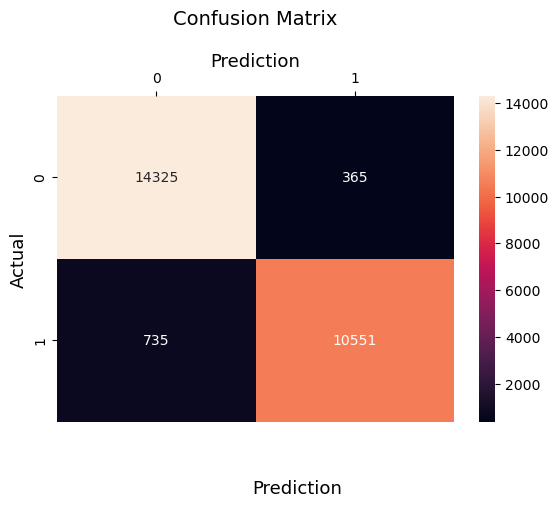

In [169]:
sns.heatmap(conf_matrix, 
            annot=True,
            fmt='g', 
           )
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=14, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

Then we got theses results for Random Forest :

| | Negative | Positive |
| ----------- | ----------- | ----------- |
**Negative** | 14325 |  365 |
**Positive** | 735 | 10551 |

In [171]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rfc) 

0.9665628435324295

In [172]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rfc)

0.9348750664540139

In [173]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_rfc)

0.9504549139717142

### Observations

We will check if our values match the equations :

#### Precision

$$
Precision = \frac{True Positive}{True Positive + False Positive}
$$

$$
Precision = \frac{10551}{10551 + 365} = 0.96656
$$

#### Recall

$$
Recall = \frac{True Positive}{True Positive + False Negative}
$$

$$
Recall = \frac{10551}{10551 + 735} = 0.93487
$$

#### F1 Score

$$
F1 score = 2 \times \frac {Precision \times recall}{Precision + recall}
$$

$$
F1 score = 2 \times  \frac{0.96656 \times 0.93487}{0.96656 + 0.93487} = 0.95045
$$

We now could see that the calculations match the result from the metrics of sklearn. 

As we said before, we are searching for getting a high value of True Positive and then having a precision > recall. Here, we can see that this is the case.

***

### Decision Tree

We will compare our results with an other model, one we haven't chosen for our dataset. 

In [176]:
from sklearn.metrics import confusion_matrix
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
conf_matrix_clf

array([[13868,   822],
       [  734, 10552]], dtype=int64)

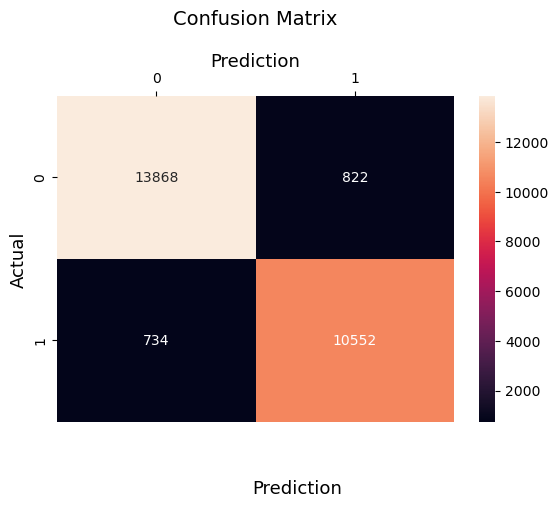

In [177]:
sns.heatmap(conf_matrix_clf, 
            annot=True,
            fmt='g', 
           )
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=14, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

Then we got theses results for Decision Tree :

| | Negative | Positive |
| ----------- | ----------- | ----------- |
**Negative** | 13868 |  822 |
**Positive** | 734 | 10552 |

Here, we can observe that our row of positives don't change so much, but our row of negatives is quite different.

In [179]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_clf)

0.9277299103217865

In [180]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_clf)

0.9349636718057771

In [181]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_clf)

0.931332744924978

### Observations

We will check if our values match the equations :

#### Precision


$$
Precision = \frac{10552}{10552 + 822} = 0.92773
$$

#### Recall


$$
Recall = \frac{10552}{10552 + 734} = 0.93496
$$

#### F1 Score


$$
F1 score = 2 \times  \frac{0.92773 \times 0.93496}{0.92773 + 0.93496} = 0.93133
$$

We now could see that the calculations match the result from the metrics of sklearn. 

As we said before, we are searching for getting a low value of False Positive. Here, we can see that this is not the case.

***

We are now going to compare the results of the metrics between these two models.

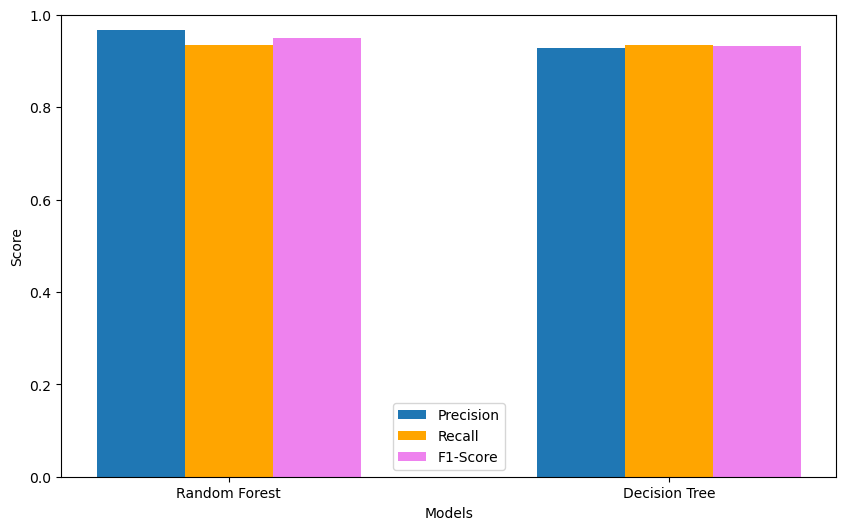

In [183]:
models = ['Random Forest', 'Decision Tree']
precision_scores = [0.9665628435324295,0.9277299103217865]
recall_scores = [0.9348750664540139, 0.9349636718057771]
f1_scores = [0.9504549139717142, 0.931332744924978]

x = np.arange(len(models)) 
width = 0.2 

plt.figure(figsize=(10, 6))

plt.bar(x - width, precision_scores, width, label='Precision')
plt.bar(x, recall_scores, width, label='Recall', color='orange')
plt.bar(x + width, f1_scores, width, label='F1-Score', color='violet')

plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend()
plt.show()

### Observations

By plotting the metrics of the two models on the same graph, we can clearly see that Precision is more important with the Random Forest model. Then we clearly have Precion > Recall and we can be sure to predict well the satisfaction of the passengers. We could also say that we make the right choice by choosing this model for our Dataset.

# Re-evaluating fine-tuned Random Forest model

Here, we will try different parameters for the GridSearchCV class, to see which parameters are the best for our model.

In [186]:
# Prepare fine tuning
rf_classifier = RandomForestClassifier()
params_RF = {
    'n_estimators': [ 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 12, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2,4],
    'max_features': ['sqrt']
 }

#perform grid search and get the best parameters.
gs_RF = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_RF,
                     cv=3,
                     verbose=1,
                     scoring='f1_weighted')
gs_RF.fit(X_train, y_train)
gs_RF.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [314]:
# Train the classifier, passing the parameter values that came out of the grid search. And then evaluate.
model = RandomForestClassifier(criterion = 'entropy',
 max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 2,
 min_samples_split = 5,
 n_estimators = 100)
scores = cross_val_score(model, X, y, cv=5, scoring="f1_weighted")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.9611 f1 with a standard deviation of 0.00


In [188]:
# Prepare fine tuning
rf_classifier = RandomForestClassifier()
params_RF = {
    'n_estimators': [ 100, 150],
    'criterion': ['gini'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2,4],
    'max_features': ['sqrt']
 }

#perform grid search and get the best parameters.
gs_RF = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_RF,
                     cv=3,
                     verbose=1,
                     scoring='f1_weighted')
gs_RF.fit(X_train, y_train)
gs_RF.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [189]:
# Train the classifier, passing the parameter values that came out of the grid search. And then evaluate.
model = RandomForestClassifier(criterion = 'gini',
 max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 2,
 min_samples_split = 5,
 n_estimators = 150)
scores = cross_val_score(model, X, y, cv=5, scoring="f1_weighted")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.9611 f1 with a standard deviation of 0.00


In [190]:
# Prepare fine tuning
rf_classifier = RandomForestClassifier()
params_RF = {
    'n_estimators': [ 100, 200],
    'criterion': ['entropy'],
    'max_depth': [10,15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2,4],
    'max_features': ['log2']
 }

#perform grid search and get the best parameters.
gs_RF = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_RF,
                     cv=3,
                     verbose=1,
                     scoring='f1_weighted')
gs_RF.fit(X_train, y_train)
gs_RF.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [191]:
# Train the classifier, passing the parameter values that came out of the grid search. And then evaluate.
model = RandomForestClassifier(criterion = 'entropy',
 max_depth = 15,
 max_features = 'log2',
 min_samples_leaf = 2,
 min_samples_split = 2,
 n_estimators = 200)
scores = cross_val_score(model, X, y, cv=5, scoring="f1_weighted")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.9588 f1 with a standard deviation of 0.00


In [192]:
# Prepare fine tuning
rf_classifier = RandomForestClassifier()
params_RF = {
    'n_estimators': [ 100, 200],
    'criterion': ['gini'],
    'max_depth': [None,10,15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2,4],
    'max_features': ['log2']
 }

#perform grid search and get the best parameters.
gs_RF = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_RF,
                     cv=3,
                     verbose=1,
                     scoring='f1_weighted')
gs_RF.fit(X_train, y_train)
gs_RF.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [315]:
# Train the classifier, passing the parameter values that came out of the grid search. And then evaluate.
model = RandomForestClassifier(criterion = 'gini',
 max_depth = None,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 200)
scores = cross_val_score(model, X, y, cv=5, scoring="f1_weighted")

print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.9611 f1 with a standard deviation of 0.00


## Observations

We try different parameters on few combinations as the dataset is quite big, we needed to keep it running for a short time.

With these tests we can clearly see that our model have better performance when we use the **entropy** criterion with the **sqrt** method of calculation. 

We should not go to deep in the depth, have a low number about the samples leaf and have a middle value for the split (not to big or not to low) and we should use quite a big number for the number of estimators.

With these parameters our model will be at it best performance for our dataset.

# References

[1] https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#what-is-a-confusion-matrix

[2] https://www.geeksforgeeks.org/fine-tuning-large-language-model-llm/

[3] https://www.geeksforgeeks.org/fine-tuning-large-language-model-llm/

[4] https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/

[5] https://scikit-learn.org/stable/index.html

[6] https://seaborn.pydata.org/index.html

[7] https://stackoverflow.com/questions/13295735/how-to-replace-nan-values-in-a-dataframe-column